## Movie Data 2022:

### Finding movies for a movie night:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

In [3]:
movies_22 = pd.read_csv("movies_2022.csv", parse_dates=["release_date"]).copy()

In [4]:
movies_22.head()

,id,title,release_date,genres,director,cast,overview,original_language,spoken_languages,runtime,budget_in_millions,revenue_in_millions,vote_count,vote_average,popularity,cast_size,crew_size,production_companies,production_countries
0,646385,Scream,2022-01-12,Horror|Mystery|Thriller,Matt Bettinelli-Olpin,Melissa Barrera|Mason Gooding|Jenna Ortega|Jac...,Twenty-five years after a streak of brutal mur...,en,English,114.00,24.00,140.04,2309,6.70,302.29,38.00,207.00,Paramount|Project X Entertainment|Radio Silenc...,United States of America
1,508947,Turning Red,2022-03-10,Animation|Family|Comedy|Fantasy,Domee Shi,Rosalie Chiang|Sandra Oh|Ava Morse|Hyein Park|...,Thirteen-year-old Mei is experiencing the awkw...,en,广州话 / 廣州話|普通话|한국어/조선말|Français|English,100.00,190.00,18.88,4086,7.50,324.93,66.00,120.00,Walt Disney Pictures|Pixar,United States of America
2,836225,The Exorcism of God,2022-03-11,Horror,Alejandro Hidalgo,Will Beinbrink|María Gabriela de Faría|Irán Ca...,An American priest working in Mexico is consid...,en,Español|English,98.00,1.50,0.00,810,7.20,277.00,7.00,18.00,Epica Pictures INC,Mexico|United States of America|Venezuela
3,414906,The Batman,2022-03-01,Crime|Mystery|Thriller,Matt Reeves,Robert Pattinson|Zoë Kravitz|Paul Dano|Jeffrey...,"In his second year of fighting crime, Batman u...",en,English,177.00,185.00,770.95,7802,7.70,241.41,82.00,201.00,6th & Idaho|Dylan Clark Productions|DC Films|W...,United States of America
4,575322,Project Gemini,2022-01-06,Science Fiction|Horror,Serik Beyseu,Egor Koreshkov|Alena Konstantinova|Konstantin ...,After depleting Earth's resources for centurie...,en,English|Pусский,98.00,0.00,0.00,313,5.80,254.71,8.00,15.00,KD Studios,Russia


In [5]:
movies_22.genres[0]

'Horror|Mystery|Thriller'

In [6]:
#With masking I am filtering the data

mask_genres = movies_22.genres.str.contains("Action") & movies_22.genres.str.contains("Science Fiction")
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
31032    False
31033    False
31034    False
31035    False
31036    False
Name: genres, Length: 31037, dtype: bool

In [7]:
mask_vote = movies_22.vote_count >= 500
mask_vote

0         True
1         True
2         True
3         True
4        False
         ...  
31032    False
31033    False
31034    False
31035    False
31036    False
Name: vote_count, Length: 31037, dtype: bool

In [8]:
#top action & science fiction movies of the year

movies_22.loc[mask_genres & mask_vote, ["title", "vote_average"]].sort_values("vote_average", ascending=False)

,title,vote_average
13,Everything Everywhere All at Once,7.90
6469,Dragon Ball Super: Super Hero,7.90
14029,Prey,7.80
21791,Avatar: The Way of Water,7.70
14041,DC League of Super-Pets,7.40
21793,Black Panther: Wakanda Forever,7.30
6489,Lightyear,7.10
21794,Black Adam,7.10
6471,Jurassic World Dominion,6.90
14059,Samaritan,6.80


In [9]:
mask_genres1 = movies_22.genres.str.contains("Comedy") & movies_22.genres.str.contains("Drama")
mask_genres1

0        False
1        False
2        False
3        False
4        False
         ...  
31032    False
31033     True
31034    False
31035    False
31036    False
Name: genres, Length: 31037, dtype: bool

In [10]:
#top comedy & drama movies of the year:

movies_22.loc[mask_genres1 & mask_vote, ["title", "vote_average"]].sort_values("vote_average", ascending=False)

,title,vote_average
21822,A Man Called Otto,7.90
6534,Hustle,7.80
21840,Babylon,7.50
21903,The Banshees of Inisherin,7.50
22,Dog,7.40
14060,Triangle of Sadness,7.20
47,The House,7.10
14189,Look Both Ways,6.90


In [11]:
mask_genres2 = movies_22.genres.str.contains("Thriller") & movies_22.genres.str.contains("Crime")
mask_genres2

0        False
1        False
2        False
3         True
4        False
         ...  
31032    False
31033    False
31034    False
31035    False
31036     True
Name: genres, Length: 31037, dtype: bool

In [12]:
#top crime & thriller movies of the year

movies_22.loc[mask_genres2 & mask_vote, ["title", "vote_average"]].sort_values("vote_average", ascending=False)

,title,vote_average
3,The Batman,7.70
21813,Violent Night,7.60
6512,Decision to Leave,7.40
6493,Memory,7.00
73,Death on the Nile,6.50
14119,Amsterdam,6.10


_We can easily say that highest budget or revenue doesn't necessarily mean the highest rated movie._

In [13]:
movies_22.production_countries.value_counts().head(10)

United States of America    3298
France                      1175
United Kingdom              1063
India                        951
Canada                       691
Brazil                       629
Japan                        621
Mexico                       604
Germany                      540
South Korea                  469
Name: production_countries, dtype: int64

In [14]:
#top French movies of the year

movies_22.loc[(movies_22.production_countries == "France") & (movies_22.vote_count >= 100), 
              ["title", "director", "vote_average"]].sort_values("vote_average", ascending=False).head(10)

,title,director,vote_average
224,Full Time,Eric Gravel,7.20
6600,Tenor,Claude Zidi Jr.,7.20
14144,Revoir Paris,Alice Winocour,7.20
22107,The Innocent,Louis Garrel,7.00
22045,Masquerade,Nicolas Bedos,7.00
250,Farewell Mister Haffmann,Fred Cavayé,6.90
14283,Other People's Children,Rebecca Zlotowski,6.80
287,Another World,Stéphane Brizé,6.80
147,Notre-Dame on Fire,Jean-Jacques Annaud,6.60
21871,Overdose,Olivier Marchal,6.60


In [15]:
mask_1 = movies_22.production_countries == "United Kingdom"
mask_1

0        False
1        False
2        False
3        False
4        False
         ...  
31032    False
31033    False
31034    False
31035    False
31036    False
Name: production_countries, Length: 31037, dtype: bool

In [16]:
mask_2 = movies_22.vote_count >= 100
mask_2

0         True
1         True
2         True
3         True
4         True
         ...  
31032    False
31033    False
31034    False
31035    False
31036    False
Name: vote_count, Length: 31037, dtype: bool

In [17]:
#top British commedy movies of the year:

movies_22.loc[mask_genres1 & mask_1 & mask_2, ["title", "vote_average"]].sort_values("vote_average", ascending=False)

,title,vote_average
14250,I Used to Be Famous,7.20
47,The House,7.10
6554,"Good Luck to You, Leo Grande",7.00


### The most common words in movie overviews:

In [18]:
from wordcloud import WordCloud

In [19]:
movies_22.overview[0]

'Twenty-five years after a streak of brutal murders shocked the quiet town of Woodsboro, a new killer has donned the Ghostface mask and begins targeting a group of teenagers to resurrect secrets from the town’s deadly past.'

In [20]:
#for making word cloud we need to drop NaN values from the text:

overview = movies_22.overview.dropna()

In [21]:
overview

0        Twenty-five years after a streak of brutal mur...
1        Thirteen-year-old Mei is experiencing the awkw...
2        An American priest working in Mexico is consid...
3        In his second year of fighting crime, Batman u...
4        After depleting Earth's resources for centurie...
                               ...                        
31032    A leading figure of the "Second New Wave" of T...
31033    Two stoner best friends, Owen and Norm, are ab...
31034    Documented by a young woman hired to take behi...
31035    The anonymous man wrote down all the events he...
31036    A New York City couple decide to take a getawa...
Name: overview, Length: 26129, dtype: object

In [22]:
#connectin white spaces and turning overview into a large text.

overview_corpus = ' '.join(overview)    

In [23]:
overview_wordcloud = WordCloud(background_color="white", height=2000, width=4000, max_words=200).generate(overview_corpus)
overview_wordcloud

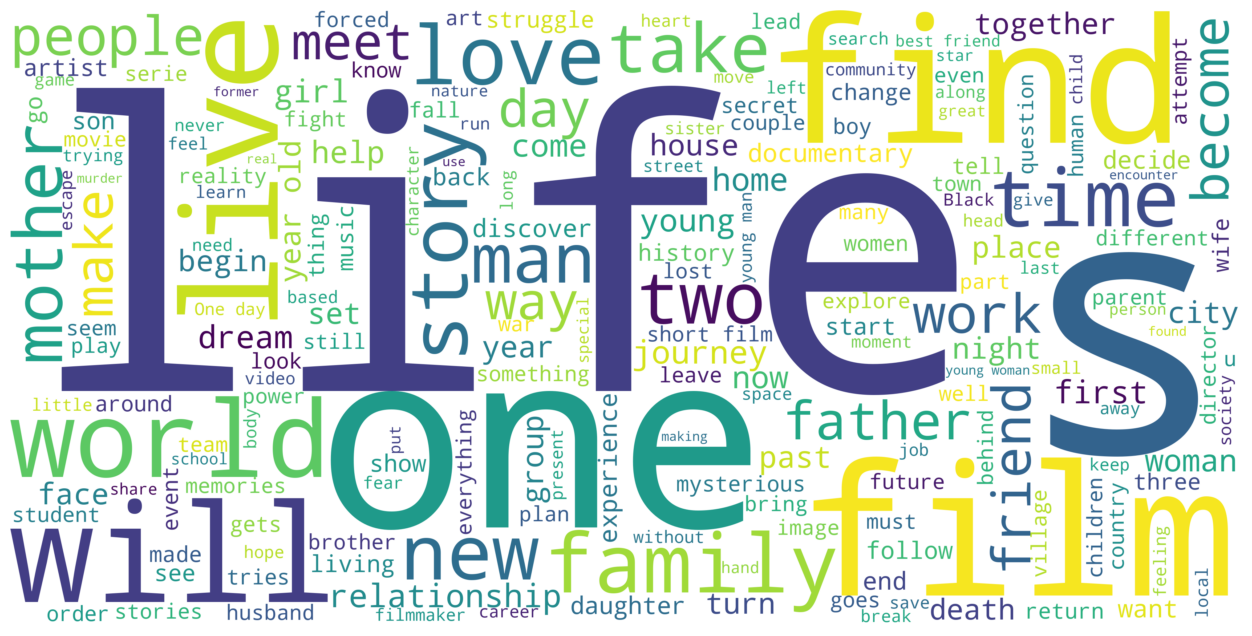

In [24]:
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud, interpolation= "bilinear")
plt.axis('off')
plt.show()

### Most Successful Directors of the Year:

In [25]:
movies_22.director

0        Matt Bettinelli-Olpin
1                    Domee Shi
2            Alejandro Hidalgo
3                  Matt Reeves
4                 Serik Beyseu
                 ...          
31032        Kassey C.M. Huang
31033                      NaN
31034                      NaN
31035          Mahmut Baldemir
31036              Rankin Dean
Name: director, Length: 31037, dtype: object

In [26]:
movies_22.director.value_counts().head(20)

Olivier Besancenot      28
Richard Poche           20
K.C.N.                  20
Pietro Pellizzieri      14
Julien Faustino         12
Alexander Jones         12
Brian Volk-Weiss        11
Han                     10
Beau Miles               9
Kevin Jerome Everson     9
Ryō Matsumoto            9
Dustin Ferguson          9
Ryan Polito              9
Damián Romay             8
Nat Hill                 8
Evan Jacobs              8
Abraham M.               8
Joel Lamangan            8
Phil Stevens             8
Roman Perez Jr.          7
Name: director, dtype: int64

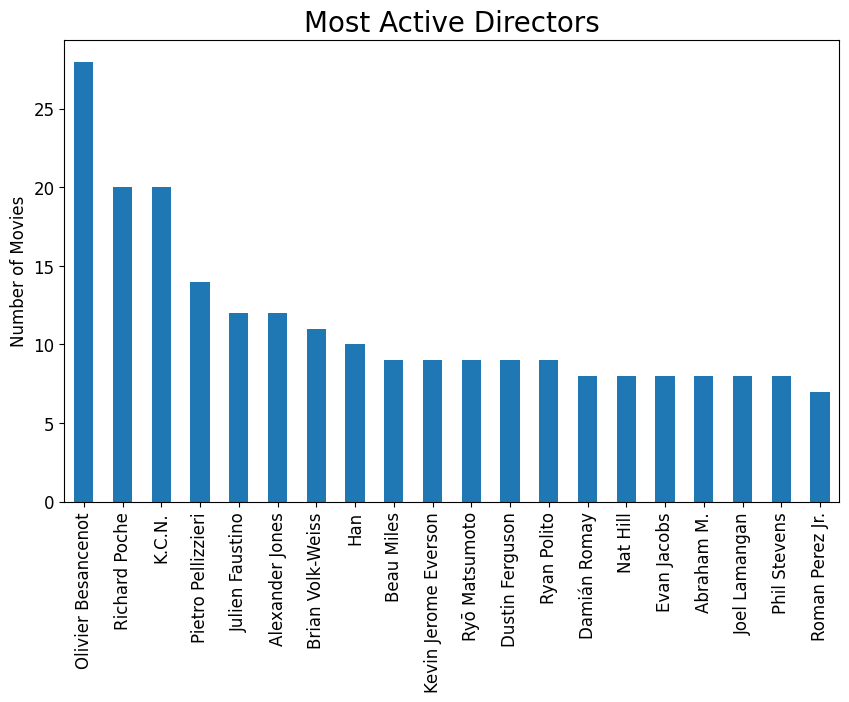

In [27]:
plt.figure(figsize = (10, 6))
movies_22.director.value_counts().head(20).plot(kind='bar', fontsize = 12)
plt.title("Most Active Directors",fontsize = 20)
plt.ylabel("Number of Movies", fontsize = 12)
plt.show()

In [28]:
most_profitable = movies_22.groupby("director").revenue_in_millions.sum().nlargest(20)
most_profitable

director
James Cameron        2312.34
Joseph Kosinski      1488.73
Colin Trevorrow      1001.98
Sam Raimi             955.78
Kyle Balda            939.63
Ryan Coogler          859.10
Matt Reeves           770.95
Taika Waititi         760.93
Tsui Hark             626.20
Joel Crawford         480.00
David Yates           406.95
Jeff Fowler           402.66
Ruben Fleischer       401.75
Jaume Collet-Serra    393.25
Makoto Shinkai        293.24
Baz Luhrmann          286.00
Pierre Perifel        250.16
David Leitch          239.27
Angus MacLane         226.43
Xing Wenxiong         217.26
Name: revenue_in_millions, dtype: float64

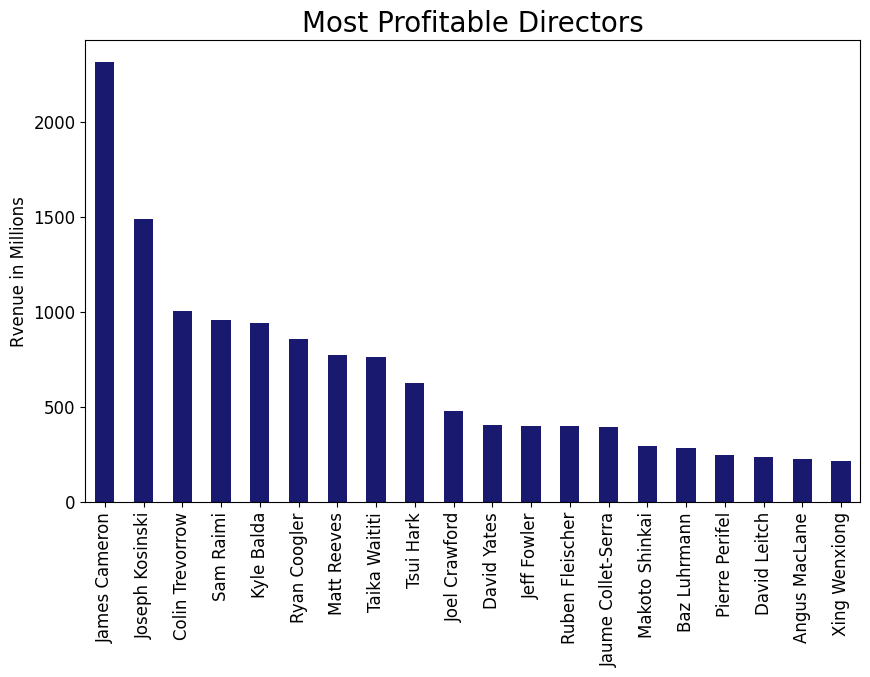

In [29]:
plt.figure(figsize = (10, 6))
most_profitable.plot(kind='bar', fontsize = 12, color="midnightblue")
plt.title("Most Profitable Directors",fontsize = 20)
plt.ylabel("Rvenue in Millions", fontsize = 12)
plt.xlabel(None)
plt.show()

In [30]:
directors = movies_22.groupby("director").agg({"title": "count", "vote_average" :"mean", "vote_count": "sum"})

In [31]:
#highest rated directors

directors[directors.vote_count >= 3000].nlargest(10, "vote_average")

,title,vote_average,vote_count
director,,,
Joel Crawford,1,8.30,5235
Daniel Scheinert,1,7.90,4400
Dan Trachtenberg,1,7.80,5392
Scott Derrickson,1,7.80,3771
James Cameron,1,7.70,7291
Matt Reeves,1,7.70,7802
Jeff Fowler,1,7.60,3846
David Leitch,1,7.50,4003
Domee Shi,1,7.50,4086


### Most Successful Actors of the Year:

In [32]:
movies_22.cast

0        Melissa Barrera|Mason Gooding|Jenna Ortega|Jac...
1        Rosalie Chiang|Sandra Oh|Ava Morse|Hyein Park|...
2        Will Beinbrink|María Gabriela de Faría|Irán Ca...
3        Robert Pattinson|Zoë Kravitz|Paul Dano|Jeffrey...
4        Egor Koreshkov|Alena Konstantinova|Konstantin ...
                               ...                        
31032                                      Tsai Ming-liang
31033                                                  NaN
31034                                                  NaN
31035    Mahmut Baldemir|Ebru Kaymakçı|Şevki Özcan|Hüse...
31036    Joshua Logan Alexander|Lauren McDonald|Nathan ...
Name: cast, Length: 31037, dtype: object

In [33]:
movies_22.set_index("id", inplace=True)

In [34]:
#first I split the actors and saved in a dataframe

actors = movies_22.cast.str.split("|", expand=True)
actors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
646385,Melissa Barrera,Mason Gooding,Jenna Ortega,Jack Quaid,Mikey Madison,Courteney Cox,David Arquette,Neve Campbell,Dylan Minnette,Skeet Ulrich,Jasmin Savoy Brown,Sonia Ammar,Roger Jackson,Kyle Gallner,Marley Shelton,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
508947,Rosalie Chiang,Sandra Oh,Ava Morse,Hyein Park,Maitreyi Ramakrishnan,Orion Lee,Wai Ching Ho,Tristan Allerick Chen,Lori Tan Chinn,Mia Tagano,Sherry Cola,Lillian Lim,James Hong,Jordan Fisher,Finneas O'Connell,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
836225,Will Beinbrink,María Gabriela de Faría,Irán Castillo,Joseph Marcell,Hector Kotsifakis,Juan Ignacio Aranda,Evelia Di Gennaro,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
414906,Robert Pattinson,Zoë Kravitz,Paul Dano,Jeffrey Wright,John Turturro,Peter Sarsgaard,Andy Serkis,Colin Farrell,Jayme Lawson,Gil Perez-Abraham,Peter McDonald,Con O'Neill,Alex Ferns,Rupert Penry-Jones,Charlie Carver,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
575322,Egor Koreshkov,Alena Konstantinova,Konstantin Samoukov,Pyotr Romanov,Nikita Dyuvbanov,Liza Martines,Viktor Potapeshkin,Dmitry Frid,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [35]:
#now it's time to reorganize this dataframe:

actors = actors.stack().reset_index(level=1, drop=True).to_frame()
actors.head()

,0
id,
646385,Melissa Barrera
646385,Mason Gooding
646385,Jenna Ortega
646385,Jack Quaid
646385,Mikey Madison


In [36]:
actors.columns = ["Actor"]

In [37]:
#we need more information for our actors dataframe:

actors = actors.merge(movies_22[["title", "release_date", "revenue_in_millions", "vote_average", "popularity"]], 
                      how="left", left_index=True, right_index=True)

In [38]:
actors.head()

,Actor,title,release_date,revenue_in_millions,vote_average,popularity
id,,,,,,
32881,Ian Hart,The Hours and Times,2022-10-05,0.00,4.00,1.58
32881,David Angus,The Hours and Times,2022-10-05,0.00,4.00,1.58
32881,Stephanie Pack,The Hours and Times,2022-10-05,0.00,4.00,1.58
32881,Robin McDonald,The Hours and Times,2022-10-05,0.00,4.00,1.58
32881,Sergio Moreno,The Hours and Times,2022-10-05,0.00,4.00,1.58


In [39]:
actors.Actor.nunique()

121781

In [40]:
actors.Actor.value_counts().head(10)

Eric Roberts         27
Vennela Kishore      25
Indrans              22
Shawn C. Phillips    21
Yogi Babu            20
Johny Antony         20
Vernon Wells         19
Tanikella Bharani    19
Min Do-yoon          19
Sunil Varma          19
Name: Actor, dtype: int64

In [41]:
#Using asome ggreagation to get more information about actors:

agg = actors.groupby("Actor").agg(Total_Revenue = ("revenue_in_millions", "sum"), 
                               Mean_Revenue = ("revenue_in_millions", "mean"),
                               Mean_Rating = ("vote_average", "mean"), 
                               Mean_Pop = ("popularity", "mean"), 
                               Total_Movies = ("Actor", "count"))

In [42]:
agg.nlargest(10, "Total_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Jemaine Clement,2515.34,419.22,4.55,825.95,6
Stephen Lang,2503.18,357.60,6.40,732.38,7
Chloe Coleman,2356.34,1178.17,7.30,2400.49,2
Zoe Saldaña,2343.58,585.90,7.10,1236.10,4
Trinity Bliss,2331.22,777.07,7.57,1711.57,3
Cliff Curtis,2312.73,770.91,7.57,1591.98,3
Alex Lucas,2312.34,2312.34,7.70,4767.60,1
Alicia Vela-Bailey,2312.34,2312.34,7.70,4767.60,1
Andrew Arrabito,2312.34,2312.34,7.70,4767.60,1


In [43]:
agg.Mean_Revenue.nlargest(10)                   #those are all Avatar cast

Actor
Alex Lucas           2312.34
Alicia Vela-Bailey   2312.34
Andrew Arrabito      2312.34
Anthony Ahern        2312.34
Benjamin Hoetjes     2312.34
Brendan Cowell       2312.34
Britain Dalton       2312.34
CCH Pounder          2312.34
CJ Jones             2312.34
Cruz Moir            2312.34
Name: Mean_Revenue, dtype: float64

We can see that this data is heavily skewed towards Avatar as it's the most profitable movie of the year and it effects the result of some calculations. 

In [44]:
agg[agg.Total_Movies >=5].nlargest(10, "Mean_Revenue")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Sigourney Weaver,2312.34,462.47,6.16,967.56,5
Jemaine Clement,2515.34,419.22,4.55,825.95,6
Stephen Lang,2503.18,357.60,6.40,732.38,7
Chris Pratt,1762.91,352.58,6.90,154.42,5
Danny Ramirez,1488.73,297.75,6.94,91.67,5
Idris Elba,1239.48,206.58,6.08,160.35,6
Laura Dern,1001.98,200.40,6.70,75.02,5
Letitia Wright,996.41,199.28,6.48,208.07,5
JP Karliak,939.63,187.93,5.24,110.58,5


In [45]:
movies_22.reset_index(inplace=True)

In [46]:
actors[actors.Actor == "Benedict Cumberbatch"]

,Actor,title,release_date,revenue_in_millions,vote_average,popularity
id,,,,,,
453395,Benedict Cumberbatch,Doctor Strange in the Multiverse of Madness,2022-05-04,955.78,7.40,280.95
644120,Benedict Cumberbatch,The Tiger Who Came to Tea,2022-09-14,0.00,6.00,2.55
931871,Benedict Cumberbatch,Behind the Scenes With Jane Campion,2022-01-27,0.00,6.20,2.98
941849,Benedict Cumberbatch,Reframing the West: Behind the Scenes of Jane ...,2022-01-26,0.00,0.00,0.71
961651,Benedict Cumberbatch,Spider-Man: All Roads Lead to No Way Home,2022-05-03,0.00,7.00,31.61
980017,Benedict Cumberbatch,Marvel Studios Assembled: The Making of Doctor...,2022-07-08,0.00,7.50,16.41


In [47]:
movies_22[movies_22.id == 644120]

,id,title,release_date,genres,director,cast,overview,original_language,spoken_languages,runtime,budget_in_millions,revenue_in_millions,vote_count,vote_average,popularity,cast_size,crew_size,production_companies,production_countries
14885,644120,The Tiger Who Came to Tea,2022-09-14,Animation|Family,Robin Shaw,Benedict Cumberbatch|David Oyelowo|David Walli...,"On a rainy day, a mother and daughter forego a...",en,English,24.00,0.00,0.00,1,6.00,2.55,6.00,3.00,Channel 4 Television|Lupus Films,United Kingdom


In [48]:
agg[agg.Total_Movies >= 10].nlargest(10, "Mean_Pop")

,Total_Revenue,Mean_Revenue,Mean_Rating,Mean_Pop,Total_Movies
Actor,,,,,
Fred Tatasciore,950.58,67.90,6.83,99.79,14
Bruce Willis,0.00,0.00,5.83,64.26,11
Tom Hanks,389.84,38.98,6.23,48.92,10
Yuki Kaji,150.80,10.77,6.21,45.12,14
Keith David,373.82,37.38,5.41,34.31,10
Meredith Thomas,0.00,0.00,5.02,29.74,10
Julie Anne Prescott,0.00,0.00,3.18,29.33,15
Subaru Kimura,91.43,8.31,3.85,28.80,11
Felissa Rose,12.40,0.95,2.18,26.30,13


In [49]:
Bruce = actors[actors.Actor == "Bruce Willis"]
Bruce

,Actor,title,release_date,revenue_in_millions,vote_average,popularity
id,,,,,,
829799,Bruce Willis,Paradise City,2022-11-11,0.00,5.80,132.93
843633,Bruce Willis,White Elephant,2022-06-03,0.00,6.40,51.76
864116,Bruce Willis,A Day to Die,2022-03-04,0.00,5.90,36.44
872177,Bruce Willis,Corrective Measures,2022-04-29,0.00,5.20,96.33
883502,Bruce Willis,Fortress: Sniper's Eye,2022-04-29,0.00,5.60,47.76
894169,Bruce Willis,Vendetta,2022-05-17,0.00,6.20,52.71
916821,Bruce Willis,Gasoline Alley,2022-02-25,0.00,5.50,38.80
921353,Bruce Willis,Wrong Place,2022-07-15,0.00,4.50,13.05
921360,Bruce Willis,Wire Room,2022-09-02,0.00,6.60,72.68


In [50]:
# List of ID numbers to filter from movies_22 dataset.

id_numbers = [829799, 843633, 864116,872177, 883502, 894169, 916821, 921353, 921360, 1024546, 1035803]
Bruce_Willis = movies_22[movies_22['id'].isin(id_numbers)]

In [51]:
#Highest rated Bruce Willis movies of the year:

Bruce_Willis[Bruce_Willis.vote_count >= 100].sort_values("vote_average", ascending=False)

,id,title,release_date,genres,director,cast,overview,original_language,spoken_languages,runtime,budget_in_millions,revenue_in_millions,vote_count,vote_average,popularity,cast_size,crew_size,production_companies,production_countries
14092,921360,Wire Room,2022-09-02,Action|Crime|Thriller,Matt Eskandari,Kevin Dillon|Bruce Willis|Oliver Trevena|Texas...,New recruit Justin Rosa must monitor arms-smug...,en,English,97.00,0.00,0.00,127,6.60,72.68,15.00,3.00,NaN,NaN
6536,843633,White Elephant,2022-06-03,Action|Crime|Thriller,Jesse V. Johnson,Michael Rooker|Bruce Willis|Olga Kurylenko|Joh...,An ex-marine enforcer must battle his conscien...,en,English,93.00,0.00,0.00,109,6.40,51.76,10.00,8.00,308 Ent|BondIt Media Capital,United States of America
6532,894169,Vendetta,2022-05-17,Action,Jared Cohn,Clive Standen|Theo Rossi|Thomas Jane|Kurt Yue|...,"When his daughter is murdered, William Duncan ...",en,English,96.00,0.00,0.00,208,6.20,52.71,23.00,20.00,The Exchange|308 Enterprises|Bar None Productions,United States of America
89,864116,A Day to Die,2022-03-04,Action|Thriller|Crime,Wes Miller,Kevin Dillon|Bruce Willis|Leon|Frank Grillo|Gi...,A disgraced parole officer is indebted to a lo...,en,English,101.00,0.10,0.00,177,5.90,36.44,16.00,41.00,Unknown South Productions,United States of America
6538,883502,Fortress: Sniper's Eye,2022-04-29,Action|Thriller|Crime,Josh Sternfeld,Chad Michael Murray|Bruce Willis|Jesse Metcalf...,Weeks after the deadly assault on Fortress Cam...,en,English,87.00,0.00,0.00,130,5.60,47.76,9.00,13.00,EFO Films|Grindstone Entertainment Group,United States of America


In [52]:
Tom = actors[actors.Actor == "Tom Hanks"]
Tom

,Actor,title,release_date,revenue_in_millions,vote_average,popularity
id,,,,,,
532639,Tom Hanks,Pinocchio,2022-09-07,0.00,6.50,104.82
614934,Tom Hanks,Elvis,2022-06-22,286.00,7.60,58.15
923252,Tom Hanks,Tom Hanks: Hollywood's Mr Nice Guy,2022-01-02,0.00,7.00,4.48
937278,Tom Hanks,A Man Called Otto,2022-12-28,103.84,7.90,242.05
962192,Tom Hanks,Halftime,2022-06-08,0.00,7.00,28.53
979163,Tom Hanks,Beyond Infinity: Buzz and the Journey to Light...,2022-06-10,0.00,7.10,36.90
989517,Tom Hanks,Exclusively Elvis: A Special Edition of 20/20,2022-06-21,0.00,7.00,1.25
1016902,Tom Hanks,Norman Lear: 100 Years of Music and Laughter,2022-09-22,0.00,6.00,3.80
1033548,Tom Hanks,Brad Pitt: More Than a Pretty Face,2022-10-09,0.00,6.20,6.68


In [53]:
id_numbers = [532639, 614934, 923252, 937278, 962192, 979163, 989517, 1016902, 1033548, 1061818]  
Tom_Hanks = movies_22[movies_22['id'].isin(id_numbers)]

In [54]:
Tom_Hanks[Tom_Hanks.vote_count >= 100].sort_values("vote_average", ascending=False)

,id,title,release_date,genres,director,cast,overview,original_language,spoken_languages,runtime,budget_in_millions,revenue_in_millions,vote_count,vote_average,popularity,cast_size,crew_size,production_companies,production_countries
21822,937278,A Man Called Otto,2022-12-28,Comedy|Drama,Marc Forster,Tom Hanks|Mariana Treviño|Rachel Keller|Manuel...,"When a lively young family moves in next door,...",en,English|Español,126.00,50.00,103.84,1042,7.90,242.05,37.00,40.00,Playtone|SF Studios|2DUX²|Artistic Films|Colum...,Sweden|United States of America
6526,614934,Elvis,2022-06-22,Drama|Music|History,Baz Luhrmann,Austin Butler|Tom Hanks|Olivia DeJonge|Helen T...,The life story of Elvis Presley as seen throug...,en,English,159.00,85.00,286.00,2515,7.60,58.15,96.00,48.00,Bazmark Films|The Jackal Group|Warner Bros. Pi...,Australia|United States of America
6556,979163,Beyond Infinity: Buzz and the Journey to Light...,2022-06-10,Documentary,Tony Kaplan,Angus MacLane|Pete Docter|Jeff Pidgeon|Jason H...,Explore the evolution of Buzz Lightyear from t...,en,English,35.00,0.00,0.00,215,7.10,36.90,18.00,7.00,Pixar,United States of America
6579,962192,Halftime,2022-06-08,Documentary|Music,Amanda Micheli,Jennifer Lopez|Ben Affleck|Lorene Scafaria|Sha...,Global superstar Jennifer Lopez reflects on he...,en,English,95.00,0.00,0.00,116,7.00,28.53,16.00,26.00,Nuyorican Productions,United States of America
14066,532639,Pinocchio,2022-09-07,Fantasy|Adventure|Family,Robert Zemeckis,Benjamin Evan Ainsworth|Tom Hanks|Joseph Gordo...,A wooden puppet embarks on a thrilling adventu...,en,English,105.00,0.00,0.00,1343,6.50,104.82,15.00,69.00,Walt Disney Pictures|Depth of Field,United States of America
